# Excercises Electric Machinery Fundamentals
## Chapter 2

## Problem 2-5

In [1]:
%pylab inline
%precision 4
from scipy import constants as c   # we like to use some constants
%config InlineBackend.figure_formats={'svg',}  # use high quality SVG instead of PNGs

Populating the interactive namespace from numpy and matplotlib


### Description
When travelers from the USA and Canada visit Europe, they encounter a different power distribution
system. Wall voltages in North America are 120 V rms at 60 Hz, while typical wall voltages in Europe
are 230 V at 50 Hz, which means:

In [2]:
#60Hz side (North America)
Vrms60 = 120 # [V]
freq60 = 60  # [Hz]

#50Hz side (Europe)
Vrms50 = 240 # [V]
freq50 = 50  # [Hz]

Many travelers carry small step-up / step-down transformers so that they can use
their appliances in the countries that they are visiting. A typical transformer might be rated at 1-kVA and
115/230 V. It has 500 turns of wire on the 115-V side and 1000 turns of wire on the 230-V side, through which it's known that:

In [3]:
S = 1000     # Apparent power (VA)
NP60 = 500   # Primary turns at 115V side
NP50 = 1000  # Primary turns at 230V side

The magnetization curve for this transformer is shown in Figure P2-2, and can be found in [p22_mag.dat](data/p22_mag.dat) at [this book's Web site](http://www.mhhe.com/engcs/electrical/chapman/).

<img src="figs/FigC_P2-2.jpg" width="100%">

In [4]:
#Load the magnetization curve data
import pandas as pd
# The data file is stored in the repository
fileUrl = 'data/p22_mag.dat'
data = pd.read_csv(fileUrl,     # the address where to download the datafile from
                   sep=' ',     # our data source uses a blank space as separation
                   comment='%', # ignore lines starting with a "%" 
                   skipinitialspace = True,  # ignore intital spaces
                   header=None, # we don't have a header line defined...
                   names=['mmf_data', 'flux_data'] # ...instead we define the names here
                   ) 

#### (a)
Suppose that this transformer is connected to a 120-V, 60 Hz power source with no load connected
to the 240-V side. 
 
 * Sketch the magnetization current that would flow in the transformer.
 * What is the rms amplitude of the magnetization current?
 * What percentage of full-load current is the magnetization current?

#### (b)
Now suppose that this transformer is connected to a 240-V, 50 Hz power source with no load
connected to the 120-V side.
 
 * Sketch the magnetization current that would flow in the transformer.
 * What is the rms amplitude of the magnetization current?
 * What percentage of full-load current is the magnetization current?

#### (c)

 * In which case is the magnetization current a higher percentage of full-load current? Why?

### SOLUTION

#### (a)

When this transformer is connected to a 120-V 60 Hz source, the flux in the core will be given by
the equation
$$\phi(t) = - \frac{V_M}{\omega N_P}\cos(\omega t)$$

Calculate the angular velocity $\omega$:

In [5]:
w60 = 2 * pi * freq60
print('w = {:.4f} rad/s'.format(w60))

w = 376.9911 rad/s


Calculate the maximum voltage $V_M$:

In [6]:
VM60 = Vrms60 * sqrt(2)
print('VM = {:.4f} V'.format(VM60) )

VM = 169.7056 V


Calculate flux versus time $\phi(t)$ (saved as a vector):

In [7]:
time = linspace(0, 1./30, 100)              # 0 to 1/30 sec
flux60 = -VM60 / (w60 * NP60) * cos(w60 * time)

The magnetization current required for a given flux $\phi(t)$ can be found from Figure P2-2 or from the equivalent table in file [p22_mag.dat](data/p22_mag.dat) by using the interpolation function:

In [8]:
mmf60 = interp(flux60, data['flux_data'], data['mmf_data'])

Calculate the magnetization current $i_m$:

In [9]:
im60 = mmf60 / NP60

**Calculate the rms value of the current $i_\text{rms}$:**

In [10]:
irms60 = sqrt(sum(im60**2) / im60.size)
print('The rms current at 120 V and 60 Hz is {:.4f} A'.format(irms60))

The rms current at 120 V and 60 Hz is 0.3186 A


Calculate the full-load current:

In [11]:
i_fl60 = S / Vrms60

**Calculate the percentage of full-load current:**

In [12]:
percnt60 = irms60 / i_fl60 * 100
print('The magnetization current is {:.3f}% of full-load current.'.format(percnt60))

The magnetization current is 3.823% of full-load current.


**Sketch the magnetization current $i_m$ that would flow in the transformer:**

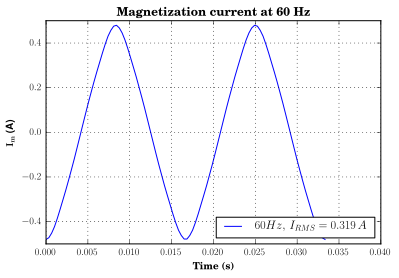

In [13]:
rc('text', usetex=True)   # enable LaTeX commands for plot
title(r'\bf Magnetization current at 60 Hz')
xlabel(r'\bf Time (s)')
ylabel(r'$\mathbf{I_m}$ \textbf{(A)}')
axis([0,0.04,-0.5,0.5])   #set the axis range
plot(time,im60)
legend(('$60 Hz,\,I_{{RMS}} = {:.3f}\,A$'.format(irms60),), loc=4);
grid()

#### (b)

When this transformer is connected to a 240-V 50 Hz source, the flux in the core will be given by
the equation 
$$\phi(t) = - \frac{V_M}{\omega N_S}\cos(\omega t)$$

Calculate the angular velocity $\omega$:

In [14]:
w50 = 2 * pi * freq50
print('w = {:.4f} rad/s'.format(w50) )

w = 314.1593 rad/s


Calculate the maximum voltage $\text{V}_\text{M}$:

In [15]:
VM50 = Vrms50 * sqrt(2)
print('VM = {:.4f} V'.format(VM50) )

VM = 339.4113 V


Calculate flux versus time $\phi(t)$ (saved as a vector):

In [16]:
time = linspace(0, 1.0/25, 100)               # 0 to 1/25 sec
flux50 = -VM50 / (w50 * NP50) * cos(w50 * time)

The magnetization current required for a given flux $\phi(t)$ can be found from Figure P2-2 or from the equivalent table in file [p22_mag.dat](data/p22_mag.dat) by using the interpolation function:

In [17]:
mmf50 = interp(flux50, data['flux_data'], data['mmf_data'])

Calculate the magnetization current $\text{i}_\text{m}$:

In [18]:
im50 = mmf50 / NP50

**Calculate the rms value of the current $i_\text{rms}$:**

In [19]:
irms50 = sqrt(sum(im50**2) / im50.size)
print('The rms current at 120 V and 50 Hz is {:.5f} A'.format(irms50))

The rms current at 120 V and 50 Hz is 0.22983 A


Calculate the full-load current:

In [20]:
i_fl50 = S / Vrms50

**Calculate the percentage of full-load current:**

In [21]:
percnt50 = irms50 / i_fl50 * 100
print('The magnetization current is {:.3f}% of full-load current.'.format(percnt50))

The magnetization current is 5.516% of full-load current.


**Sketch the magnetization current $i_m$ that would flow in the transformer:**

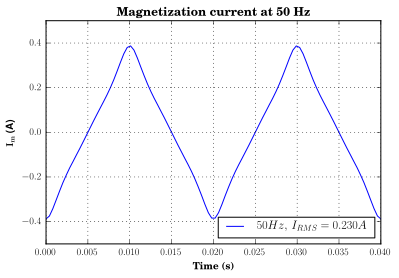

In [22]:
rc('text', usetex=True)   # enable LaTeX commands for plot
title(r'\bf Magnetization current at 50 Hz')
xlabel(r'\bf Time (s)')
ylabel(r'$\mathbf{I_m}$ \textbf{(A)}')
axis([0,0.04,-0.5,0.5])   #set the axis range
plot(time,im50)
legend(('$50 Hz,\,I_{{RMS}} = {:.3f} A$'.format(irms50),), loc=4);
grid()

#### (c)

The magnetization current is a higher percentage of the full-load current for the 50 Hz case than for
the 60 Hz case. This is true because the peak flux is higher for the 50 Hz waveform, driving the core
further into saturation.